# Homework RNNs
1. Download and explore data
2. Preproceess data if needed
3. Create a dataset with group of inputs of size X = (10-50) - Randomly sample points, and take the next X points
3.a. Either randomly sample different points to get xs and ys
3.b Or Take evert possible datapoint from 0 to size of dataset - x. and shuffle the dataset
4. Make it into a tensorflow dataset, Split the data into train and test
5. Time distributed predictions with size 5-10
6. Use 3 different model architectures (RNN type / wavenet)
7. Prints the different graphs

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input
from keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
#!wget https://storage.googleapis.com/nicksdemobucket/sunspots.csv

# OR

#Using temperature dataset for this assignment
!wget https://storage.googleapis.com/nicksdemobucket/temperatures.csv

# OR MNIST

--2022-04-17 15:03:53--  https://storage.googleapis.com/nicksdemobucket/temperatures.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/csv]
Saving to: ‘temperatures.csv.2’

temperatures.csv.2  100%[===================>]  66.33K  --.-KB/s    in 0.001s  

2022-04-17 15:03:53 (57.8 MB/s) - ‘temperatures.csv.2’ saved [67921/67921]



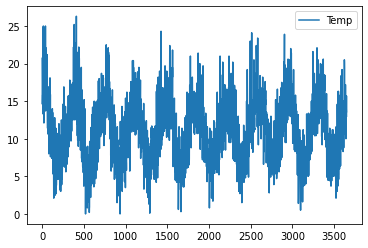

In [ ]:
df = pd.read_csv('temperatures.csv')

df.plot()

In [ ]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [ ]:
#No null values
df.count()

Date    3650
Temp    3650
dtype: int64

In [ ]:
df.shape

(3650, 2)

In [ ]:
sc = MinMaxScaler()

df['Temp'] = sc.fit_transform(np.array(df['Temp']).reshape(-1, 1))

### Defining functions for plotting

In [ ]:
def plot_series(x, y, color='r'):
  plt.plot(x.reshape(-1), 'o-')
  plt.scatter(26, y, c=color)
  plt.grid(True)

In [ ]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[2]
    ahead = Y.shape[2]
    plot_series(X[0, :, 0], 25)
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, 0, :], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, 0, :], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=12)
    plt.gca().set_ylim(0.4, 0.75)
    plt.gca().set_xlim(25, 30)

### Adding the columns to create input and output sequence

In [ ]:
for s in range(1, 31):
    df['shift_{}'.format(s)] = df['Temp'].shift(s)

### Shuffling Dataset

In [ ]:
df.sample(frac=1)

,Date,Temp,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,...,shift_21,shift_22,shift_23,shift_24,shift_25,shift_26,shift_27,shift_28,shift_29,shift_30
2416,1987-08-15,0.448669,0.346008,0.266160,0.285171,0.266160,0.186312,0.330798,0.338403,0.201521,...,0.110266,0.057034,0.254753,0.243346,0.266160,0.239544,0.357414,0.342205,0.269962,0.205323
2944,1989-01-25,0.577947,0.475285,0.479087,0.570342,0.551331,0.608365,0.498099,0.528517,0.631179,...,0.638783,0.703422,0.661597,0.543726,0.536122,0.562738,0.490494,0.490494,0.361217,0.600760
1193,1984-04-08,0.342205,0.475285,0.471483,0.368821,0.311787,0.349810,0.391635,0.368821,0.422053,...,0.524715,0.539924,0.414449,0.539924,0.460076,0.422053,0.593156,0.433460,0.524715,0.399240
871,1983-05-22,0.235741,0.285171,0.315589,0.281369,0.186312,0.174905,0.254753,0.444867,0.551331,...,0.475285,0.456274,0.384030,0.330798,0.494297,0.479087,0.399240,0.536122,0.627376,0.551331
2645,1988-03-31,0.612167,0.692015,0.665399,0.623574,0.589354,0.634981,0.615970,0.528517,0.547529,...,0.551331,0.615970,0.634981,0.638783,0.539924,0.482890,0.562738,0.566540,0.593156,0.471483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,1984-03-24,0.676806,0.631179,0.524715,0.460076,0.532319,0.574144,0.524715,0.539924,0.414449,...,0.399240,0.334601,0.479087,0.513308,0.425856,0.574144,0.444867,0.513308,0.536122,0.627376
1805,1985-12-12,0.536122,0.600760,0.558935,0.631179,0.623574,0.692015,0.555133,0.612167,0.623574,...,0.399240,0.501901,0.429658,0.463878,0.456274,0.365019,0.380228,0.798479,0.589354,0.532319
633,1982-09-26,0.292776,0.437262,0.323194,0.239544,0.201521,0.152091,0.159696,0.216730,0.338403,...,0.171103,0.190114,0.399240,0.380228,0.152091,0.288973,0.482890,0.539924,0.266160,0.174905
2928,1989-01-09,0.619772,0.596958,0.463878,0.361217,0.437262,0.638783,0.703422,0.661597,0.543726,...,0.665399,0.631179,0.908745,0.787072,0.749049,0.596958,0.547529,0.418251,0.543726,0.768061


In [ ]:
df.set_index('Date')
df.columns

Index(['Date', 'Temp', 'shift_1', 'shift_2', 'shift_3', 'shift_4', 'shift_5',
       'shift_6', 'shift_7', 'shift_8', 'shift_9', 'shift_10', 'shift_11',
       'shift_12', 'shift_13', 'shift_14', 'shift_15', 'shift_16', 'shift_17',
       'shift_18', 'shift_19', 'shift_20', 'shift_21', 'shift_22', 'shift_23',
       'shift_24', 'shift_25', 'shift_26', 'shift_27', 'shift_28', 'shift_29',
       'shift_30'],
      dtype='object')

### Converting to Tensor dataset

In [ ]:
ds = tf.data.Dataset.from_tensor_slices(dict(df))

In [ ]:
type(ds)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

### Splitting dataset into train and test

Using first 5 shifts has sequenced output and remaining 25 as sequence of inputs

In [ ]:
X = df.dropna().drop(['Temp', 'Date', 'shift_1', 'shift_2', 'shift_3', 'shift_4', 'shift_5'], axis=1)
y = df.dropna()[['shift_1', 'shift_2', 'shift_3', 'shift_4', 'shift_5']]

In [ ]:
X.shape, y.shape

((3620, 25), (3620, 5))

In [ ]:
#splitting the rest set further into test and validation set
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.3, random_state=4)
X_valid, X_test, y_valid, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=4)

In [ ]:
X_train = np.array(X_train).reshape(len(X_train), 1, 25)
y_train = np.array(y_train).reshape(len(y_train), 1, 5)
X_valid = np.array(X_valid).reshape(len(X_valid), 1, 25)
y_valid = np.array(y_valid).reshape(len(y_valid), 1, 5)
X_test = np.array(X_test).reshape(len(X_test), 1, 25)
y_test = np.array(y_test).reshape(len(y_test), 1, 5)

### Defining loss function

In [ ]:
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

### Model 1: RNN

In [ ]:
model_rnn = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 25]),
    keras.layers.SimpleRNN(15, return_sequences=True),
    keras.layers.SimpleRNN(10, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(5))
])

In [ ]:
model_rnn.compile(loss="mse", optimizer=keras.optimizers.Adam(), metrics=[last_time_step_mse])

history_rnn = model_rnn.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid))

Epoch 1/3
80/80 [==============================] - 13s 41ms/step - loss: 0.1195 - last_time_step_mse: 0.1195 - val_loss: 0.0222 - val_last_time_step_mse: 0.0222
Epoch 2/3
80/80 [==============================] - 1s 13ms/step - loss: 0.0203 - last_time_step_mse: 0.0203 - val_loss: 0.0176 - val_last_time_step_mse: 0.0176
Epoch 3/3
80/80 [==============================] - 1s 13ms/step - loss: 0.0174 - last_time_step_mse: 0.0174 - val_loss: 0.0156 - val_last_time_step_mse: 0.0156


In [ ]:
model_rnn.evaluate(X_test, y_test)

17/17 [==============================] - 0s 7ms/step - loss: 0.0169 - last_time_step_mse: 0.0169


[0.01694853976368904, 0.01694853976368904]

In [ ]:
y_pred_rnn = model_rnn.predict(X_test)

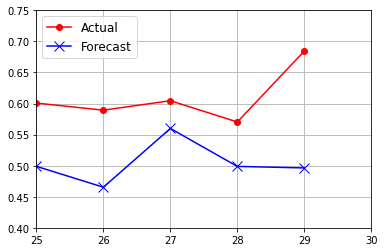

In [ ]:
plot_multiple_forecasts(X_test, y_test, y_pred_rnn)

### Model 2: LSTM

In [ ]:
model_lstm = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 25]),
    keras.layers.LSTM(15, return_sequences=True),
    keras.layers.LSTM(10, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(5))
])

In [ ]:
model_lstm.compile(loss="mse", optimizer=keras.optimizers.Adam(), metrics=[last_time_step_mse])
history_lstm = model_lstm.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid))

Epoch 1/3
80/80 [==============================] - 23s 27ms/step - loss: 0.1132 - last_time_step_mse: 0.1132 - val_loss: 0.0196 - val_last_time_step_mse: 0.0196
Epoch 2/3
80/80 [==============================] - 1s 7ms/step - loss: 0.0143 - last_time_step_mse: 0.0143 - val_loss: 0.0121 - val_last_time_step_mse: 0.0121
Epoch 3/3
80/80 [==============================] - 1s 8ms/step - loss: 0.0123 - last_time_step_mse: 0.0123 - val_loss: 0.0116 - val_last_time_step_mse: 0.0116


In [ ]:
model_lstm.evaluate(X_test, y_test)

17/17 [==============================] - 0s 3ms/step - loss: 0.0127 - last_time_step_mse: 0.0127


[0.012652707286179066, 0.012652707286179066]

In [ ]:
y_pred_lstm = model_lstm.predict(X_test)

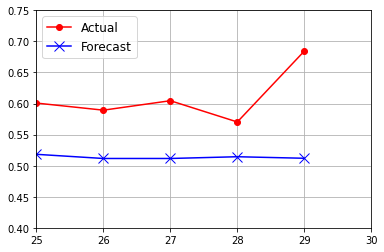

In [ ]:
plot_multiple_forecasts(X_test, y_test, y_pred_lstm)

### Model 3: GRU

In [ ]:
model_gru = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 25]),
    keras.layers.GRU(15, return_sequences=True),
    keras.layers.GRU(10, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(5))
])

In [ ]:
model_gru.compile(loss="mse", optimizer=keras.optimizers.Adam(), metrics=[last_time_step_mse])
history_gru = model_gru.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid))

Epoch 1/3
80/80 [==============================] - 8s 25ms/step - loss: 0.0875 - last_time_step_mse: 0.0875 - val_loss: 0.0154 - val_last_time_step_mse: 0.0154
Epoch 2/3
80/80 [==============================] - 1s 8ms/step - loss: 0.0150 - last_time_step_mse: 0.0150 - val_loss: 0.0130 - val_last_time_step_mse: 0.0130
Epoch 3/3
80/80 [==============================] - 1s 8ms/step - loss: 0.0130 - last_time_step_mse: 0.0130 - val_loss: 0.0118 - val_last_time_step_mse: 0.0118


In [ ]:
model_gru.evaluate(X_test, y_test)

17/17 [==============================] - 0s 3ms/step - loss: 0.0127 - last_time_step_mse: 0.0127


[0.012716584838926792, 0.012716584838926792]

In [ ]:
y_pred_gru = model_gru.predict(X_test)

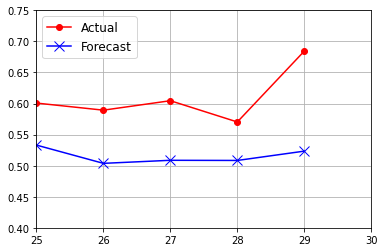

In [ ]:
plot_multiple_forecasts(X_test, y_test, y_pred_gru)

### Plot 1: Based on history

In [ ]:
df1 = pd.DataFrame(history_rnn.history['last_time_step_mse'], columns=["RNN"])
df1["LSTM"] = history_lstm.history['last_time_step_mse']
df1["GRU"] = history_gru.history['last_time_step_mse']

df1

,RNN,LSTM,GRU
0,0.119455,0.113248,0.087491
1,0.020287,0.014317,0.015045
2,0.017444,0.012318,0.012957


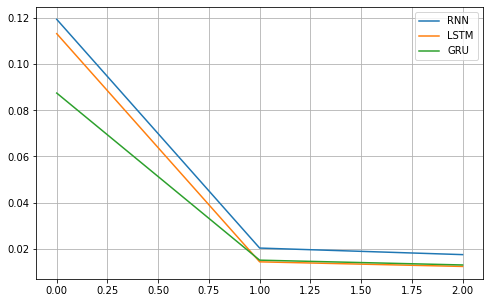

In [ ]:
df1.plot(figsize=(8, 5))
plt.grid(True)
plt.show()

### Plot 2: Combining preds

In [ ]:
def plot_multiple_forecasts_combined(X, Y, Y_rnn, Y_lstm, Y_gru):
    n_steps = X.shape[2]
    ahead = Y.shape[2]
    plot_series(X[0, :, 0], 25)
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, 0, :], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_rnn[0, 0, :], "bx-", label="RNN", markersize=10, color = "green")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_lstm[0, 0, :], "bx-", label="LSTM", markersize=10, color = "blue")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_gru[0, 0, :], "bx-", label="GRU", markersize=10, color = "yellow")
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.gca().set_ylim(0.4, 0.75)
    plt.gca().set_xlim(25, 30)
    plt.legend(fontsize=10)

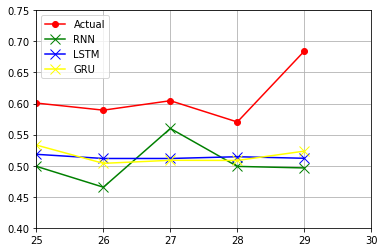

In [ ]:
plot_multiple_forecasts_combined(X_test, y_test, y_pred_rnn, y_pred_lstm, y_pred_gru)